In [1]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import time
import random
import re
from datetime import date
import os
import glob
import regex as re
import numpy as np
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
import pickle

In [2]:
# %ls
file_extension = '.csv'
# data_files = os.listdir('C://Users/Akash/New folder (4)/Untitled Folder/north/')
path = 'C://Users/Akash/New folder (4)/Untitled Folder/north/'
all_filenames = []
cities = ["jaipur", "jalandhar", "ludhiana", "newdelhi", "bikaner","lucknow","bhopal","shimla"] #change the cities
for city in cities:
#     data_files = 'C://Users/Akash/New folder (4)/Untitled Folder/north/*2021.csv'
# all_filenames = [i for i in glob.glob(f"*{file_extension}")]
    all_filenames.append(path+city+'-2021.csv')
df = pd.concat([pd.read_csv(f) for f in all_filenames])
# all_filenames
df

,Unnamed: 0,date,tmax,realfeelmax,realfeel_shade,windspd,winddir,windgust,prain,ppt,tmin,realfeelmin
0,0,2021-09-16,31,35,33,17,NNE,44,42%,0.4,23.0,23
1,1,2021-09-17,30,31,31,20,N,54,25%,0.0,24.0,25
2,2,2021-09-18,29,34,32,15,NE,37,68%,3.1,24.0,28
3,3,2021-09-19,30,37,34,7,NNE,22,40%,1.1,24.0,28
4,4,2021-09-20,31,39,36,6,NE,20,41%,1.7,23.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,2021-12-10,17,19,17,6,S,20,2%,0.0,6.0,2
87,87,2021-12-11,16,17,16,7,SSW,17,56%,1.2,5.0,3
88,88,2021-12-12,16,19,16,7,WNW,20,0%,0.0,5.0,2
89,89,2021-12-13,16,19,16,7,S,22,0%,0.0,6.0,1


In [3]:
def todigit(temp):
    x = re.sub("[^0-9]", "", str(temp))
    return x

# df['tmin'] = df['tmin'].apply(todigit)
df['realfeelmin'] = df['realfeelmin'].apply(todigit)
df['prain']=df['prain'].apply(todigit)
# df['realfeelmax'] = df['realfeelmax'].apply(todigit)
df['tmax'] = df['tmax'].apply(todigit)
df['realfeelmin'] = df['realfeelmin'].apply(todigit)
df['tmin'] = pd.to_numeric(df['tmin'])
df['realfeelmin'] = pd.to_numeric(df['realfeelmin'])
df['prain'] = pd.to_numeric(df['prain'])
df['date']=pd.to_datetime(df['date'])
df['newyear'] = pd.to_datetime('2021/01/01')
df['days']=df['date'] - df['newyear']
df['days'] = df['days'].dt.days
df = df[['tmin','realfeelmin']]
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
# s_scaler = preprocessing.StandardScaler()
sc_Y = preprocessing.StandardScaler()
sc_X = preprocessing.StandardScaler()
y = df.pop('realfeelmin')
col_names = list(df.columns)
y = pd.Series(sc_Y.fit_transform(y.values.reshape(len(y),1))[:,0])
# y = s_scaler.fit_transform(y))
X_df= sc_X.fit_transform(df)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tmin,728.0,4.593395e-16,1.000688,-1.978472,-0.887039,-0.159417,0.932016,2.387259


In [4]:
df.isna().sum()

tmin    0
dtype: int64

In [5]:
%pwd

'C:\\Users\\Akash\\New folder (4)\\Untitled Folder'

In [6]:
from sklearn.model_selection import train_test_split
# Spliting input samples into test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.20,random_state=100)
X_test

,tmin
239,-0.705134
494,-0.341323
447,-0.887039
592,0.022488
149,-0.705134
...,...
503,-0.887039
216,0.386299
574,0.750110
173,-1.068944


In [7]:
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# First Hidden Layer - 3 Nodes, 2 Input Features and Sigmoid Activation Function
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 1))
# Second Hidden Layer - 5 nodes, and Sigmoid Activation Function
#model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Output Layer - One node and Linear Activation
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))

# Compiling the ANN - Defining ANN Parameters - SGD - Stochastic Gradient Descent, Losss Function as Mean Square of Error etc
opt= SGD(lr=0.01, momentum=0.9)

model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['accuracy'])


X:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
# fit model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 5, epochs=300, verbose=0)
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

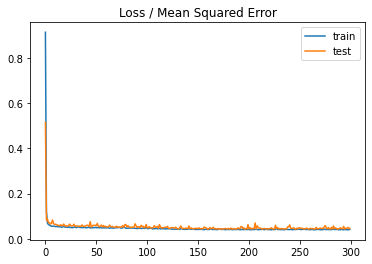

In [9]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
ynew=model.predict(X_test)

In [11]:
# yh = pd.Series(s_scaler.inverse_transform(ynew.reshape(len(ynew),4))[:,0])
ynew.shape
yh = sc_Y.inverse_transform(ynew)

In [12]:
 from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,yh)

In [13]:
dfresult = pd.DataFrame({'actual':list(sc_Y.inverse_transform(y_test)),'predicted': list(yh.flatten()), 'tmin':sc_Y.inverse_transform(X_test['tmin'])})

In [14]:
dfresult

,actual,predicted,tmin
0,11.0,11.232887,11.098531
1,15.0,13.433687,13.657900
2,8.0,9.988512,9.818847
3,17.0,15.364286,16.217269
4,11.0,11.232887,11.098531
...,...,...,...
141,11.0,9.988512,9.818847
142,20.0,17.360138,18.776638
143,19.0,19.897532,21.336006
144,9.0,8.659266,8.539162


In [15]:
dfresult.to_csv('resultsrealfeel.csv')

In [16]:
model.save('model3')

INFO:tensorflow:Assets written to: model3\assets


In [17]:
model.save_weights('weights_realfeel3.h5')

In [ ]:
model.weights

In [ ]:
X_test

In [19]:
import pickle
pickle.dump(sc_X, open('sc_X3.pkl','wb'))
pickle.dump(sc_Y, open('sc_Y3.pkl','wb'))


# sc = pickle.load(open('file/path/scaler.pkl','rb'))

In [ ]:
# df = pd.read_csv('C://Users/Akash/New folder (4)/Untitled Folder/north/ludhiana-2019.csv')
# df['newyear'] = pd.to_datetime('2019/01/01')
# df['date']=pd.to_datetime(df['date'])
# df['days']=df['date'] - df['newyear']
# df['days'] = df['days'].dt.days

# df.rename(columns={'maxwspd':'windspd','maxtemp':'tmax', 'mintemp':'tmin'}, inplace= True)
# X= df[['tmax', 'tmin', 'windspd','days']]
# col_names = list(X.columns)
# # sc_X = pickle.load(open('sc_X.pkl','rb'))
# # sc_Y = pickle.load(open('sc_Y.pkl','rb'))
# X_df= sc_X.fit_transform(X)
# X_df = pd.DataFrame(X, columns=col_names)   
# X_df.describe().T

In [ ]:
print(sc_X.fit_transform(X_df))

In [ ]:
# df = pd.read_csv('C://Users/Akash/New folder (4)/Untitled Folder/north/ludhiana-2019.csv')
# df['newyear'] = pd.to_datetime('2019/01/01')
# df['date']=pd.to_datetime(df['date'])
# df['days']=df['date'] - df['newyear']
# df['days'] = df['days'].dt.days

# df.rename(columns={'maxwspd':'windspd','maxtemp':'tmax', 'mintemp':'tmin'}, inplace= True)
# X= df[['tmin']]
# col_names = list(X.columns)
# # sc_X = pickle.load(open('sc_X.pkl','rb'))
# # sc_Y = pickle.load(open('sc_Y.pkl','rb'))
# X_df= sc_X.fit_transform(X)
# X_df = pd.DataFrame(X_df, columns=col_names)   
# X_df.describe().T

In [ ]:
# y = model.predict(X_df)
# realfeelmin = sc_X.inverse_transform(y)
# df['realfeelmin']=realfeelmin
# df.to_csv('C://Users/Akash/New folder (4)/Untitled Folder/north/ludhiana-2019.csv')